In [29]:
import numpy as np
n = 10;
alpha = 1;
sigma2 = np.array([0.82, 0.91, 0.16, 0.18, 0.28, 0.2, 0.04, 0.07, 0.36, 0.97]);
pmin = 0;
pmax = 1.5;
G = np.array([[13.0, 0.47, 0.84, 0.95, 0.2, 0.05, 0.8, 0.09, 0.48, 0.71], [0.54, 29.0, 0.91, 0.8, 0.87, 0.48, 0.51, 0.95, 0.06, 0.44], [0.26, 0.35, 27.0, 0.12, 0.65, 0.67, 0.39, 0.78, 0.47, 0.28], [0.91, 0.77, 0.72, 11.0, 0.59, 0.84, 0.48, 0.18, 0.38, 0.34], [0.17, 0.04, 0.12, 0.08, 21.0, 0.17, 0.07, 0.08, 0.98, 0.24], [0.66, 0.27, 0.77, 0.78, 0.74, 29.0, 0.48, 0.68, 0.22, 0.07], [0.58, 0.07, 0.8, 0.1, 0.55, 0.78, 18.0, 0.93, 0.86, 0.11], [0.87, 0.16, 0.04, 0.84, 0.48, 0.51, 0.45, 11.0, 0.07, 0.89], [0.97, 0.61, 0.48, 0.18, 0.6, 0.62, 0.64, 0.65, 29.0, 0.51], [0.77, 0.14, 0.9, 0.31, 0.79, 0.31, 0.67, 0.6, 0.85, 23.0]]);

In [30]:
import cvxpy as cp
p = cp.Variable((n,1), nonneg = True)
t = cp.Parameter(nonneg = True)
constraints= [p >= pmin,
              p <= pmax
              ]
#constraints = constraints + [(sigma2[i] + cp.sum(cp.vstack([G[i,j] * p[j] for j in  range(n) if i !=j]))) * cp.exp((cp.sum(p)+t)/alpha) - (sigma2[i] + cp.sum(cp.vstack([G[i,j] * p[j] for j in  range(n)]))) <= 0 for i in range(n)]
constraints = constraints + [G[i,i]*p[i] >= t*(sigma2[i] + cp.sum(cp.vstack([G[i,j]*p[j] for j in range(n) if j != i]))) for i in range(n)]
#t =  cp.min(cp.vstack([cp.log1p((G[i,i]*p[i])/(sigma2[i] + cp.sum(cp.vstack([G[i,j] * p[j] for j in  range(n) if i !=j])))) for i in range(n)]))

objective = cp.Minimize(cp.sum(p))
problem = cp.Problem(objective, constraints)


In [124]:
samples = 20
t_vals = np.logspace(-0.1,0.595 , num = samples, base = 10)
p_values = []
for k in range(samples):
  t.value = t_vals[k]
  problem.solve()
  p_values.append(p.value)



In [25]:
t_vals

array([1.00000000e-04, 1.90084790e-04, 3.61322276e-04, 6.86818691e-04,
       1.30553787e-03, 2.48162892e-03, 4.71719914e-03, 8.96667810e-03,
       1.70442913e-02, 3.23986054e-02, 6.15848211e-02, 1.17063378e-01,
       2.22519677e-01, 4.22976062e-01, 8.04013161e-01, 1.52830673e+00,
       2.90507865e+00, 5.52211267e+00, 1.04966963e+01, 1.99526231e+01])

In [95]:
p_values

[array([[0.05495647],
        [0.0276491 ],
        [0.00672838],
        [0.0211166 ],
        [0.01200806],
        [0.00798334],
        [0.00538328],
        [0.01343958],
        [0.01315499],
        [0.03673259]]),
 array([[0.0604403 ],
        [0.03044891],
        [0.00758191],
        [0.02393158],
        [0.01324373],
        [0.00900826],
        [0.00632028],
        [0.01561359],
        [0.0147132 ],
        [0.04039091]]),
 array([[0.06656323],
        [0.03358486],
        [0.00857509],
        [0.02721419],
        [0.01463009],
        [0.01020263],
        [0.00745441],
        [0.01820829],
        [0.01650221],
        [0.04447302]]),
 array([[0.07342541],
        [0.03711193],
        [0.00973846],
        [0.03106338],
        [0.01619174],
        [0.01160367],
        [0.00883544],
        [0.0213211 ],
        [0.01856746],
        [0.04904447]]),
 array([[0.08115044],
        [0.04109844],
        [0.01111133],
        [0.03560499],
        [0.0179591 ],
  

In [125]:
sigma_p = []
for i in range(19):
  sigma_p.append(np.sum(p_values[i]))
print(sigma_p)

[0.19915238272633382, 0.2215210318488774, 0.24701563325405188, 0.2762264426218523, 0.309897282647217, 0.34897893197753604, 0.39470647030006445, 0.44871413705198837, 0.5132108025550983, 0.5912569750683853, 0.6872192187708437, 0.807550407877127, 0.9622054220938119, 1.1673909426481373, 1.4513894628683395, 1.8683857388092058, 2.536934663456013, 3.7759559824444153, 6.837809729927388]


In [126]:
rate = [min([np.log2(((G[i,i]*p_values[K][i]) / (sigma2[i] + np.sum(np.vstack([G[i,j]*p_values[K][j] for j in range(n) if j != i]))))[0]+1) for i in range(n)]) for K in range(19)]

In [ ]:
print(rate)

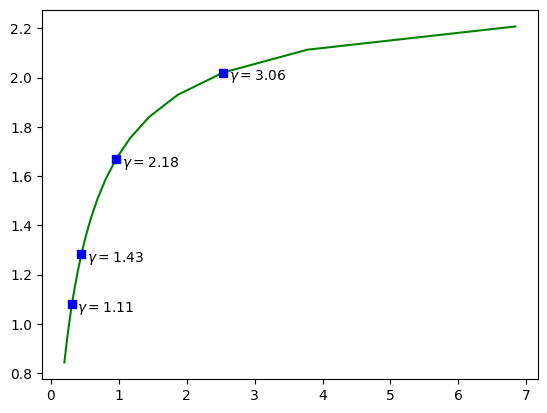

In [127]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(sigma_p[:19], rate[:19], "g-")
markers = [4,7,12,16]
for marker in markers:
    plt.plot(sigma_p[marker], rate[marker], "bs")
    ax.annotate(
        r"$\gamma = %.2f$" % t_vals[marker],
        xy=(sigma_p[marker] +0.08 , rate[marker] - 0.03),
    )
plt.show()